In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
bus_df = pd.read_csv('data_acquisition/combined/bus.csv')
metro_df = pd.read_csv('data_acquisition/combined/metro.csv')
taxi_df = pd.read_excel('data_acquisition/combined/taxi.xlsx')
uber_df = pd.read_csv('data_acquisition/combined/uber.csv')

In [86]:
bus_df.columns=['Date','Bus']
bus_df['Date'] = pd.to_datetime(bus_df['Date'],format='%Y%m')
bus_df.dtypes
bus_df.head()

,Date,Bus
0,2013-07-01,3068599.0
1,2013-08-01,3091873.0
2,2013-09-01,3252460.0
3,2013-10-01,3250529.0
4,2013-11-01,3069970.0


In [87]:
metro_df = metro_df[['Date', 'ROTP', 'RailReliability', 'MetroAccessOTP',
       'EscalatorAvail', 'ElevatorAvail', 'TotalInjuries', 'Crime',
       'Ridership']]
metro_df['Date'] = pd.to_datetime(metro_df['Date'])
metro_ride = metro_df[['Date','Ridership']]
metro_ride.head()

,Date,Ridership
0,2011-01-01,21082553
1,2011-02-01,21228262
2,2011-03-01,26170157
3,2011-04-01,25656797
4,2011-05-01,24342603


In [88]:
taxi_df.columns=['Date','Taxi']
taxi_df['Date'] = pd.to_datetime(taxi_df['Date'],format='%Y%m')
taxi_df.head()

,Date,Taxi
0,2015-05-01,1397101
1,2015-06-01,1470465
2,2015-07-01,1401791
3,2015-08-01,1129706
4,2015-09-01,1308444


In [89]:
taxi_df


,Date,Taxi
0,2015-05-01,1397101
1,2015-06-01,1470465
2,2015-07-01,1401791
3,2015-08-01,1129706
4,2015-09-01,1308444
5,2015-10-01,1487132
6,2015-11-01,993501
7,2015-12-01,1081725
8,2016-01-01,922337
9,2016-02-01,1194697


In [90]:
uber_df.columns = ['Date','Uber']
uber_df['Date'] = pd.to_datetime(uber_df['Date'],format='%Y%m')
uber_df.head()

,Date,Uber
0,2016-01-01,4336528.0
1,2016-02-01,4105444.0
2,2016-03-01,4731468.0
3,2016-04-01,4583160.0
4,2016-05-01,4918088.0


In [91]:
print(bus_df.shape)
print(metro_df.shape)
print(taxi_df.shape)
print(uber_df.shape)

(60, 2)
(84, 9)
(27, 2)
(27, 2)


In [92]:
combined_df = pd.merge(bus_df,metro_ride,on='Date',how='outer')
combined_df = pd.merge(combined_df,taxi_df,on='Date',how='outer')
combined_df = pd.merge(combined_df,uber_df,on='Date',how='outer')
combined_df = combined_df.sort_values('Date').set_index('Date')
combined_df

,Bus,Ridership,Taxi,Uber
Date,,,,
2011-01-01,NaN,21082553.0,NaN,NaN
2011-02-01,NaN,21228262.0,NaN,NaN
2011-03-01,NaN,26170157.0,NaN,NaN
2011-04-01,NaN,25656797.0,NaN,NaN
2011-05-01,NaN,24342603.0,NaN,NaN
2011-06-01,NaN,26563303.0,NaN,NaN
2011-07-01,NaN,25695119.0,NaN,NaN
2011-08-01,NaN,24335209.0,NaN,NaN
2011-09-01,NaN,23787505.0,NaN,NaN


In [93]:
combined_df.to_csv('combined.csv')

In [94]:
combined_df.dtypes

Bus          float64
Ridership    float64
Taxi         float64
Uber         float64
dtype: object

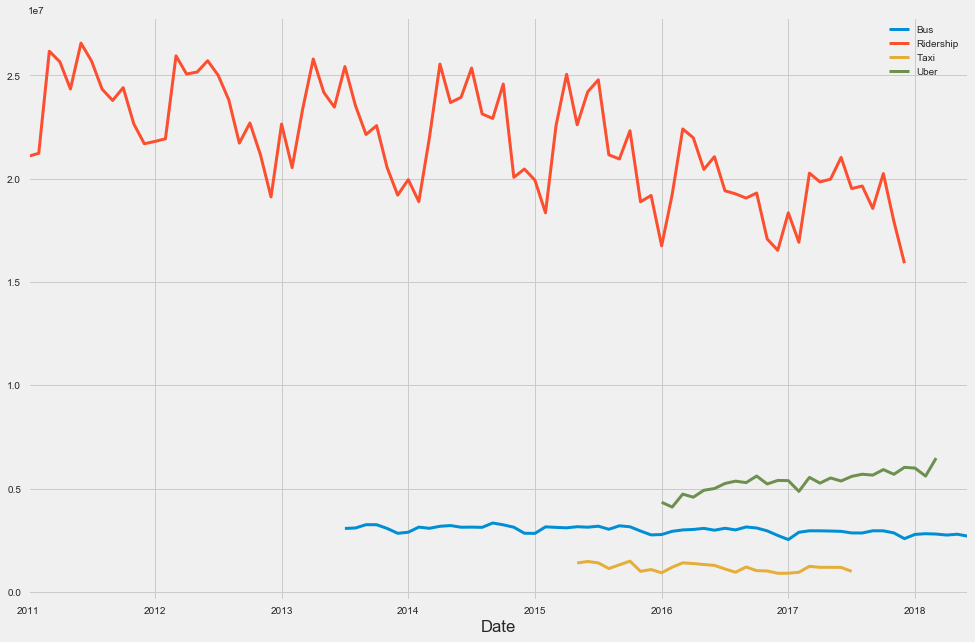

In [95]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(15,10))
combined_df.plot(ax=ax,linewidth=3)
plt.show()

In [96]:
metro_df = metro_df[['Date','ROTP', 'RailReliability', 'MetroAccessOTP', 'EscalatorAvail',
       'ElevatorAvail', 'TotalInjuries', 'Crime',]]
metro_df = metro_df.set_index('Date')

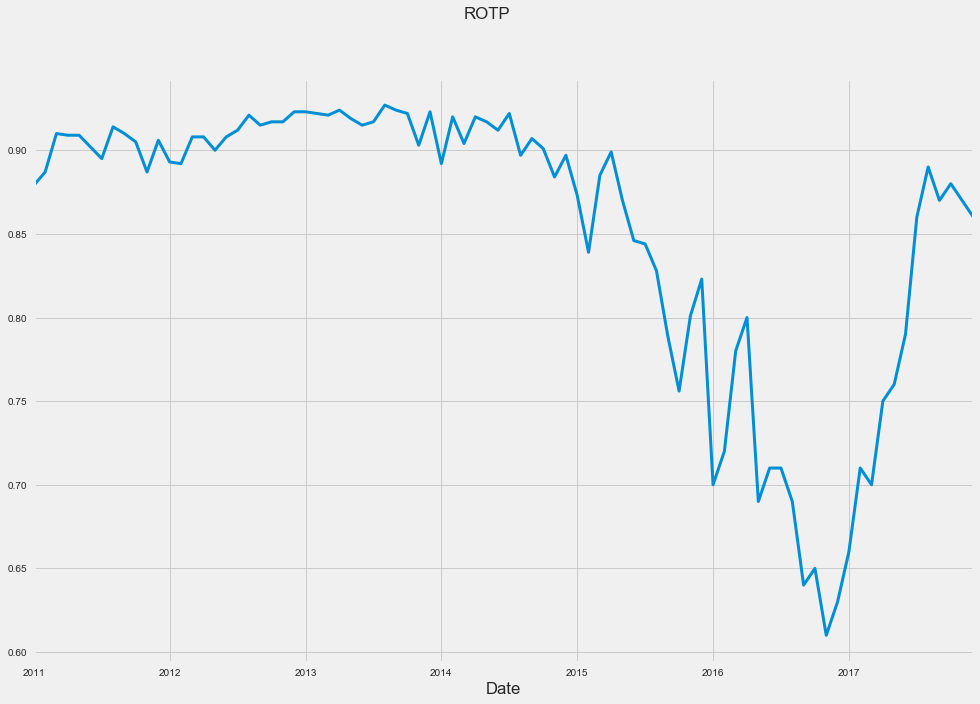

In [97]:
f, ax2 = plt.subplots(figsize=(15,10))
metro_df['ROTP'].plot(ax=ax2,linewidth=3)
plt.suptitle('ROTP')
plt.show()


In [98]:
metro_df.head()

,ROTP,RailReliability,MetroAccessOTP,EscalatorAvail,ElevatorAvail,TotalInjuries,Crime
Date,,,,,,,
2011-01-01,0.879,48241,0.901,0.888,96.30%,2.08,6.39
2011-02-01,0.887,37703,0.890,0.866,96.00%,1.66,4.68
2011-03-01,0.910,50328,0.913,0.869,96.90%,2.16,3.96
2011-04-01,0.909,39302,0.912,0.862,96.40%,2.21,4.72
2011-05-01,0.909,37355,0.922,0.825,97.40%,1.69,7.32


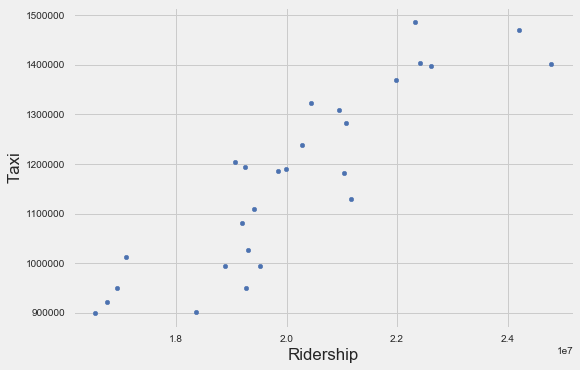

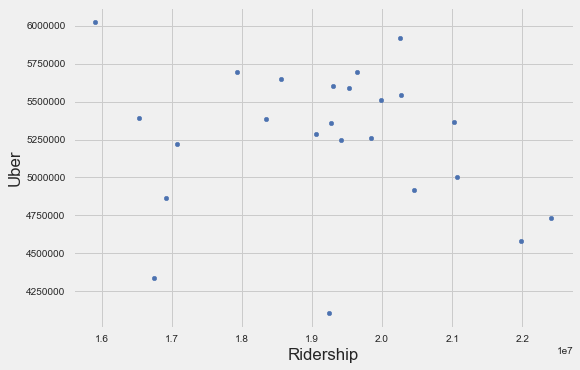

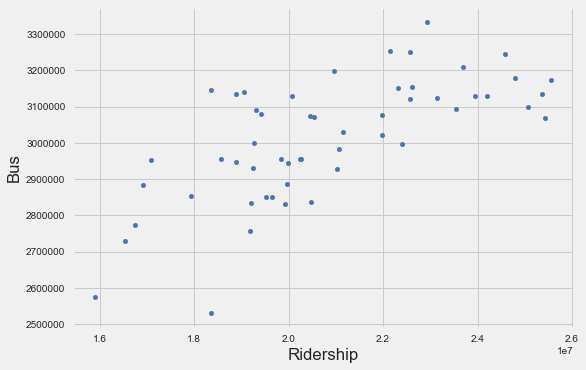

In [99]:
#to check if there is a realtion between variables
combined_df.plot(x='Ridership',y='Taxi',kind='scatter')
combined_df.plot(x='Ridership',y='Uber',kind='scatter')
combined_df.plot(x='Ridership',y='Bus',kind='scatter')

plt.show()

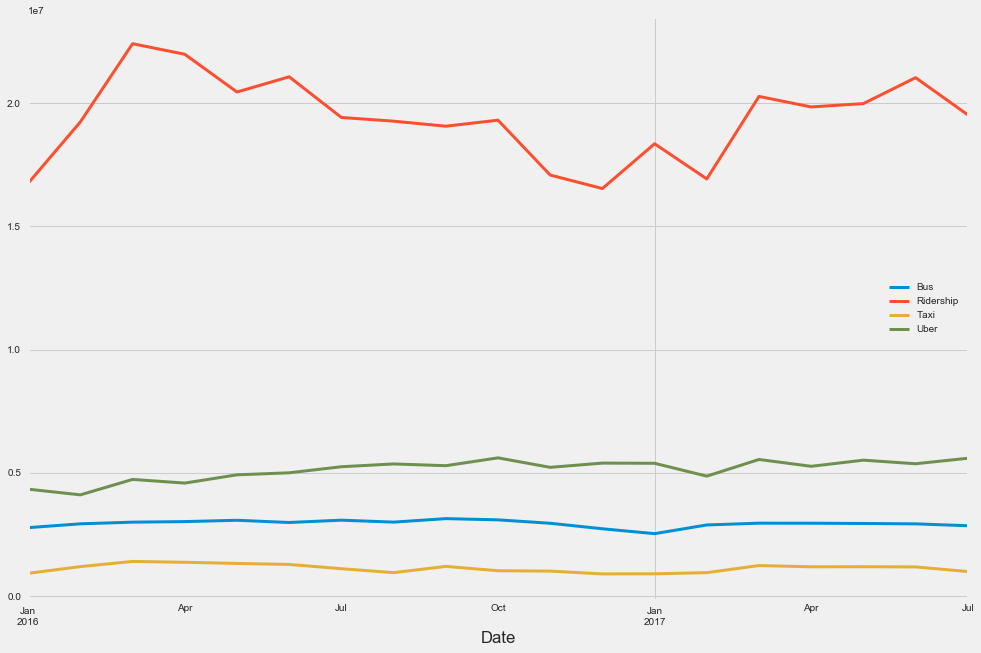

In [101]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(15,10))
combined_subset.plot(ax=ax,linewidth=3)
plt.show()

### Bivariate Linear Regression considering Metro Ridership as independent variable and other rides(Bus,Taxi,Uber) as dependent variable

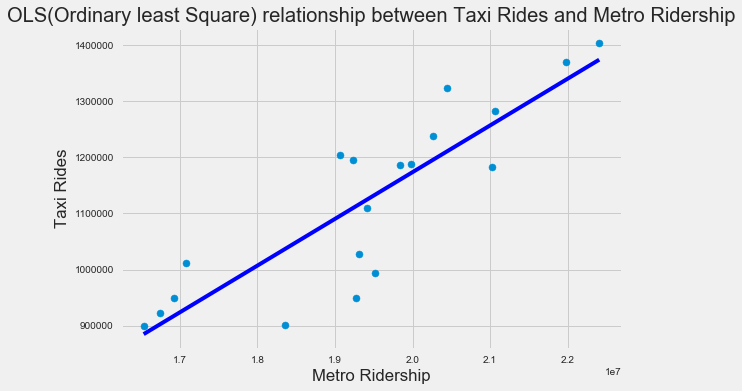

In [124]:
# Dropping NA's is required to use numpy's polyfit
combined_subset = combined_df.dropna(subset=['Bus', 'Ridership','Taxi','Uber'])
#ploting trend line for taxi rides and metro ridership
y=combined_subset['Taxi']
x=combined_subset['Ridership']
plt.scatter(x,y)
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='blue')
plt.xlabel('Metro Ridership')
plt.ylabel('Taxi Rides')
plt.title('OLS(Ordinary least Square) relationship between Taxi Rides and Metro Ridership')
plt.show()

In [142]:
#Regression model between Taxi Rides and Metro Ridership
Taxi_model = smf.OLS(y, x).fit()
# make the predictions by the model
#predictions = model.predict(x) 

# Print out the statistics
taxi_model_summary=Taxi_model.summary()
taxi_model_summary

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Uber   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           4.33e-18
Time:                        02:59:19   Log-Likelihood:                -280.12
No. Observations:                  19   AIC:                             562.2
Df Residuals:                      18   BIC:                             563.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ridership      0.2622      0.007     35.374      0.000         0.247     0.278
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.450
Skew:                          -0.639   Prob(JB):                        0.484
Kurtosis:                       2.555   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
Taxi_Regression_detail={'R2':Taxi_model.rsquared,
'Adjus R2':Taxi_model.rsquared_adj,
'Coeficent':Taxi_model.params,
            'P-values':Taxi_model.pvalues,
            'F-Statistics':Taxi_model.fvalue}
Taxi_Regression_detail

{'Adjus R2': 0.98503142703025526, 'Coeficent': Ridership    0.262165
 dtype: float64, 'F-Statistics': 1251.3260766008686, 'P-values': Ridership    4.328708e-18
 dtype: float64, 'R2': 0.98581924666024179}

In [131]:
#predicting by the model using the ridership as observation 
Taxi_predicted= Taxi_model.predict(combined_subset["Ridership"]).round(0)
print(Taxi_predicted)
#checking the difference between the observed and the predicted
Taxi_residual=combined_subset['Taxi']-Taxi_predicted

[  972919.  1117491.  1301704.  1276788.  1187863.  1223742.  1127821.
  1119180.  1107273.  1121492.   992188.   960397.  1065921.   983070.
  1177476.  1152683.  1160564.  1221681.  1134060.]


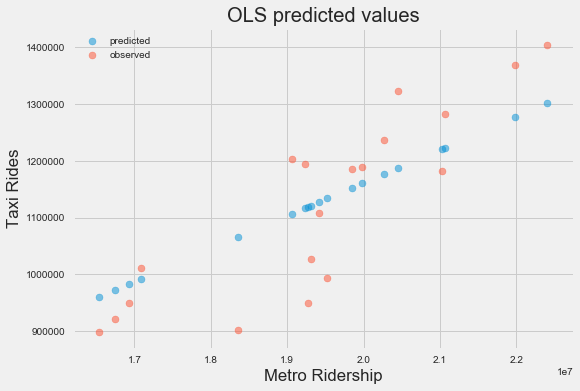

In [132]:
plt.scatter(combined_subset['Ridership'], Taxi_predicted, alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(combined_subset['Ridership'], combined_subset['Taxi'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Metro Ridership')
plt.ylabel('Taxi Rides')
plt.show()


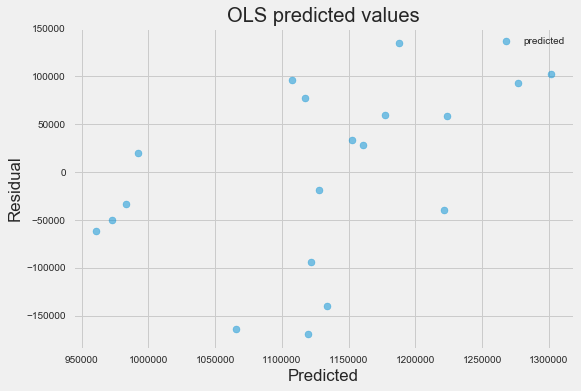

In [133]:
plt.scatter(Taxi_predicted,Taxi_residual, alpha=0.5, label='predicted')

# Plot observed values

#plt.scatter(combined_subset['Ridership'], combined_subset['Taxi'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

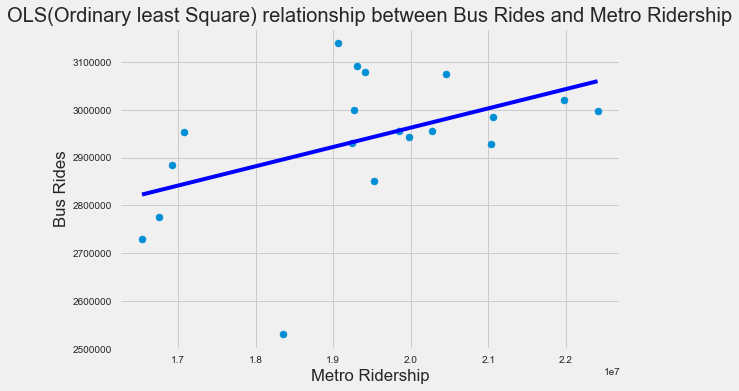

In [134]:
#ploting trend line for Bus rides and metro ridership
Y=combined_subset['Bus']
x=combined_subset['Ridership']
plt.scatter(x,Y)
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, Y, 1))(np.unique(x)),
         color='blue')
plt.xlabel('Metro Ridership')
plt.ylabel('Bus Rides')
plt.title('OLS(Ordinary least Square) relationship between Bus Rides and Metro Ridership')
plt.show()

In [143]:
#Regression model between Bus Rides and Metro Ridership
Bus_model = smf.OLS(Y, x).fit()
# make the predictions by the model
#predictions = model.predict(Y) 

# Print out the statistics
Bus_model_summary=Bus_model.summary()
Bus_model_summary

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Bus   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3216.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           9.52e-22
Time:                        03:00:00   Log-Likelihood:                -260.64
No. Observations:                  19   AIC:                             523.3
Df Residuals:                      18   BIC:                             524.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ridership      0.1507      0.003     56.714      0.000         0.145     0.156
==============================================================================
Omnibus:                        1.921   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.383   Jarque-Bera (JB):                0.996
Skew:                          -0.036   Prob(JB):                        0.608
Kurtosis:                       1.881   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
Bus_Regression_detail={'R2':Bus_model.rsquared,
'Adjus R2':Bus_model.rsquared_adj,
'Coeficent':Bus_model.params,
            'P-values':Bus_model.pvalues,
            'F-Statistics':Bus_model.fvalue}
Bus_Regression_detail

{'Adjus R2': 0.99412582364091062, 'Coeficent': Ridership    0.150717
 dtype: float64, 'F-Statistics': 3216.4960107642069, 'P-values': Ridership    9.518277e-22
 dtype: float64, 'R2': 0.99443499081770481}

In [136]:
#using the ridership as observation 
Bus_predicted= Bus_model.predict(combined_subset["Ridership"]).round(0)
print(Bus_predicted)
#checking the difference between the observed and the predicted
Bus_residual=combined_subset['Bus']-Bus_predicted

[ 2524239.  2899329.  3377269.  3312625.  3081909.  3174997.  2926131.
  2903711.  2872820.  2909711.  2574232.  2491750.  2765531.  2550575.
  3054960.  2990636.  3011083.  3169651.  2942318.]


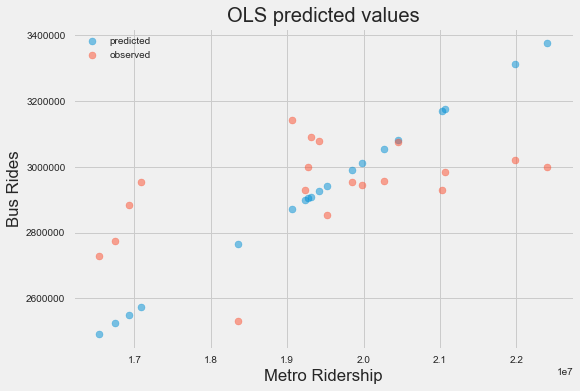

In [137]:
plt.scatter(combined_subset['Ridership'], Bus_predicted, alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(combined_subset['Ridership'], combined_subset['Bus'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Metro Ridership')
plt.ylabel('Bus Rides')
plt.show()

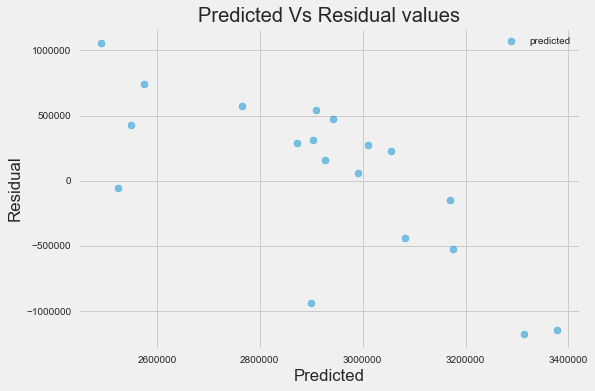

In [149]:
plt.scatter(Bus_predicted,Bus_residual, alpha=0.5, label='predicted')

# Plot observed values

#plt.scatter(combined_subset['Ridership'], combined_subset['Taxi'], alpha=0.5, label='observed')

plt.legend()
plt.title('Predicted Vs Residual values')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

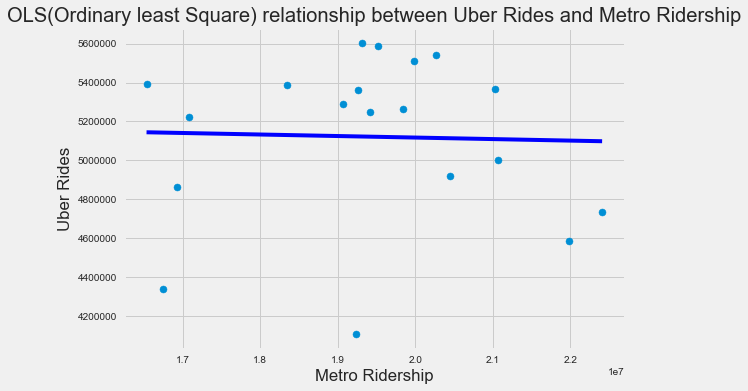

In [140]:
#ploting trend line for uber rides and metro ridership
Yu=combined_subset['Uber']
x=combined_subset['Ridership']
plt.scatter(x,y)
plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='blue')
plt.xlabel('Metro Ridership')
plt.ylabel('Uber Rides')
plt.title('OLS(Ordinary least Square) relationship between Uber Rides and Metro Ridership')
plt.show()

In [145]:
#Regression model between Uber Rides and Metro Ridership
Uber_model = smf.OLS(Yu, x).fit()
# make the predictions by the model
#predictions = model.predict(Y) 

# Print out the statistics
Uber_model_summary=Uber_model.summary()
Uber_model_summary

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Uber   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1251.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           4.33e-18
Time:                        03:01:12   Log-Likelihood:                -280.12
No. Observations:                  19   AIC:                             562.2
Df Residuals:                      18   BIC:                             563.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ridership      0.2622      0.007     35.374      0.000         0.247     0.278
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.450
Skew:                          -0.639   Prob(JB):                        0.484
Kurtosis:                       2.555   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
Uber_Regression_detail={'R2':Uber_model.rsquared,
'Adjus R2':Uber_model.rsquared_adj,
'Coeficent':Uber_model.params,
            'P-values':Uber_model.pvalues,
            'F-Statistics':Uber_model.fvalue}
Uber_Regression_detail

{'Adjus R2': 0.98503142703025526, 'Coeficent': Ridership    0.262165
 dtype: float64, 'F-Statistics': 1251.3260766008686, 'P-values': Ridership    4.328708e-18
 dtype: float64, 'R2': 0.98581924666024179}

In [147]:
#predicting by the model using the ridership as observation 
Uber_predicted= Uber_model.predict(combined_subset["Ridership"]).round(0)
print(Uber_predicted)
#checking the difference between the observed and the predicted
Uber_residual=combined_subset['Uber']-Uber_predicted

[ 4390794.  5043245.  5874600.  5762155.  5360836.  5522757.  5089867.
  5050868.  4997134.  5061304.  4477755.  4334282.  4810511.  4436604.
  5313958.  5202069.  5237637.  5513458.  5118024.]


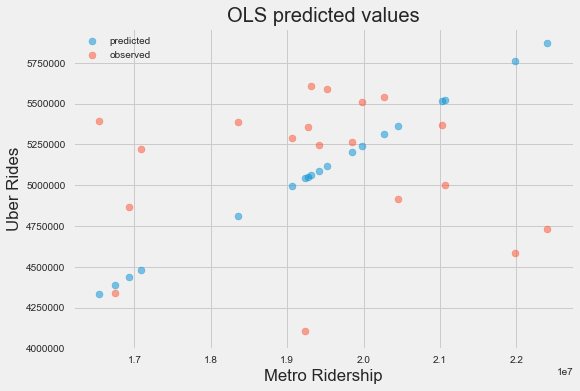

In [148]:
plt.scatter(combined_subset['Ridership'], Uber_predicted, alpha=0.5, label='predicted')

# Plot observed values

plt.scatter(combined_subset['Ridership'], combined_subset['Uber'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Metro Ridership')
plt.ylabel('Uber Rides')
plt.show()

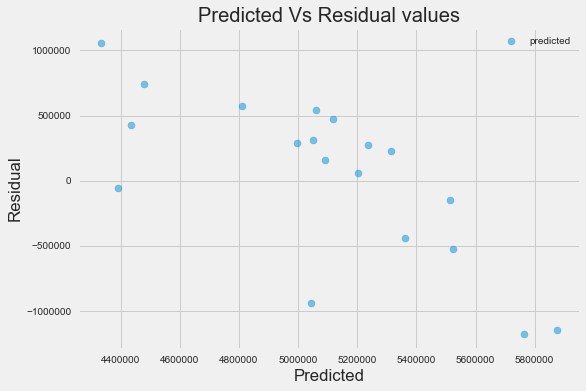

In [150]:
plt.scatter(Uber_predicted,Uber_residual, alpha=0.5, label='predicted')

# Plot observed values

#plt.scatter(combined_subset['Ridership'], combined_subset['Taxi'], alpha=0.5, label='observed')

plt.legend()
plt.title('Predicted Vs Residual values')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

linear Regression considering a constant independent variable

In [193]:
#Adding a constant column
combined_df['Const']=1
# Dropping NA's is required to use numpy's polyfit
combined_subset_cons = combined_df.dropna(subset=['Bus', 'Ridership','Taxi','Uber','Const'])

Taxi_model_cons = smf.OLS(endog=combined_subset_cons['Taxi'], exog=combined_subset_cons[['Const', 'Ridership']]).fit()
Taxi_model_cons_summary=Taxi_model_cons.summary()
Taxi_model_cons_summary

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Taxi   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     49.49
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           2.01e-06
Time:                        04:57:49   Log-Likelihood:                -241.56
No. Observations:                  19   AIC:                             487.1
Df Residuals:                      17   BIC:                             489.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Const      -4.916e+05    2.3e+05     -2.134      0.048     -9.78e+05 -5654.909
Ridership      0.0833      0.012      7.035      0.000         0.058     0.108
==============================================================================
Omnibus:                        2.078   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.707
Skew:                          -0.670   Prob(JB):                        0.426
Kurtosis:                       2.400   Cond. No.                     2.30e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""